In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import imageio
import torch

# Clear the cache
torch.cuda.empty_cache()

### Function Tests

Use these to test if your implementation of functions in GMM work as expected. See [Using the Local Tests](#using_local_tests) for more details.


In [2]:
from src.Gaussian2D import Gaussian2D

cpu


In [3]:
# helper function for performing pixel clustering.
# def GaussianSplatting(image, K, max_iters):
#     """Clusters pixels in the input image

#     Args:
#         image: input image of shape(H, W, 3)
#         K: number of components
#     Return:
#         clustered_img: image of shape(H, W, 3) after pixel clustering
#     """
#     image = image.astype(np.float32)
#     gs_img, iter_list, loss_list = Gaussian2D(image, K=K, max_iters=max_iters, lr=1)()

#     return gs_img


# helper function for plotting images. You don't have to modify it
def plot_images(img_list, title_list, figsize=(20, 10)):
    assert len(img_list) == len(title_list)
    fig, axes = plt.subplots(1, len(title_list), figsize=figsize)
    for i, ax in enumerate(axes):
        ax.imshow(img_list[i] / 255.0)
        ax.set_title(title_list[i])
        ax.axis("off")

def plot_loss(iter_list, loss_list):
    plt.figure(figsize=(10, 5))
    plt.plot(iter_list, loss_list, marker='o', linestyle='-')
    plt.xlabel('Iteration')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs. Iteration')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
    plt.grid(True)
    plt.show()

iter 299, loss: 34.0957: 100%|█████████████████████████████████████████████| 300/300 [3:12:27<00:00, 38.49s/it]


Final scales: 
Parameter containing:
tensor([[5., 5.],
        [5., 5.],
        [5., 5.],
        ...,
        [5., 5.],
        [5., 5.],
        [5., 5.]], requires_grad=True)



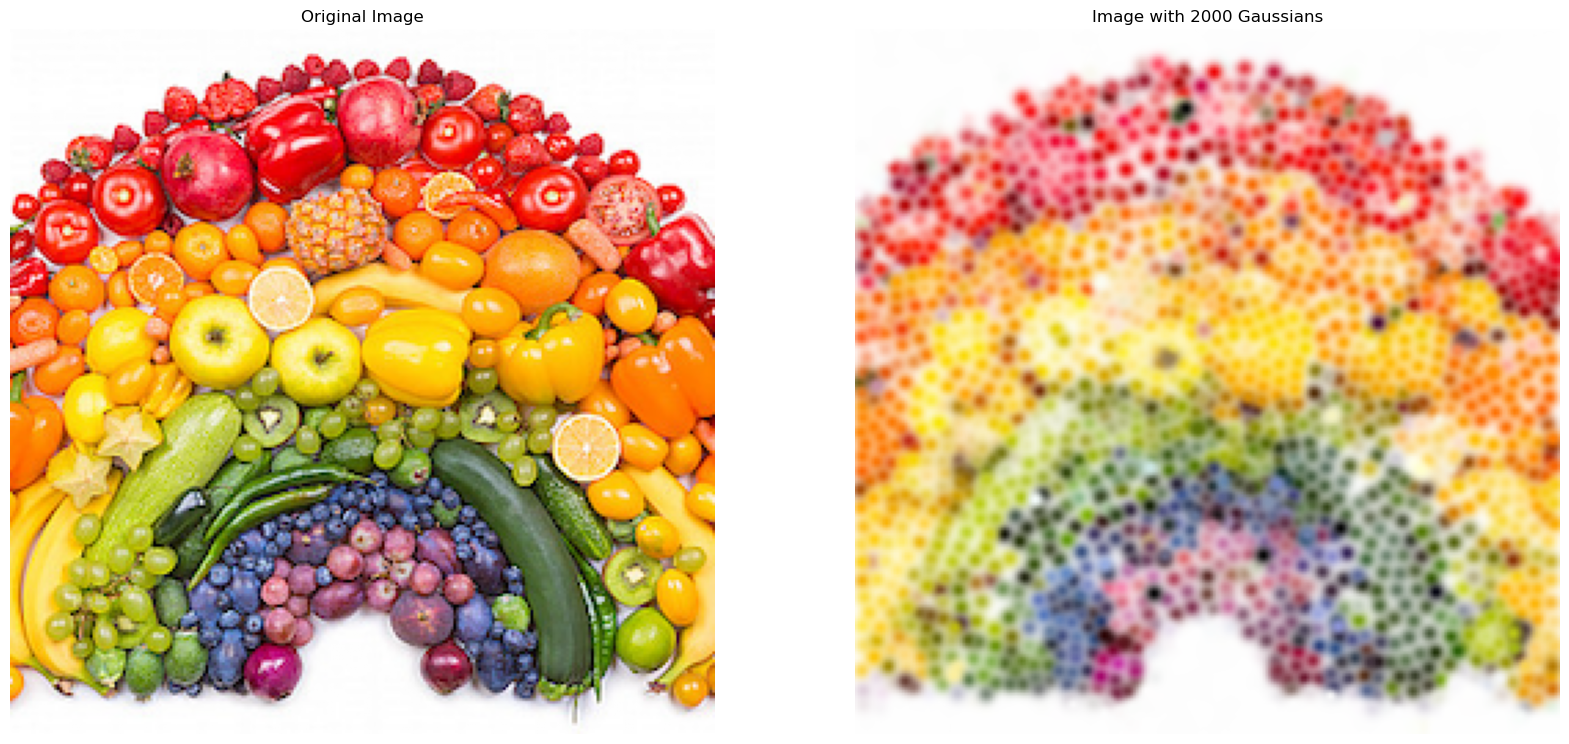

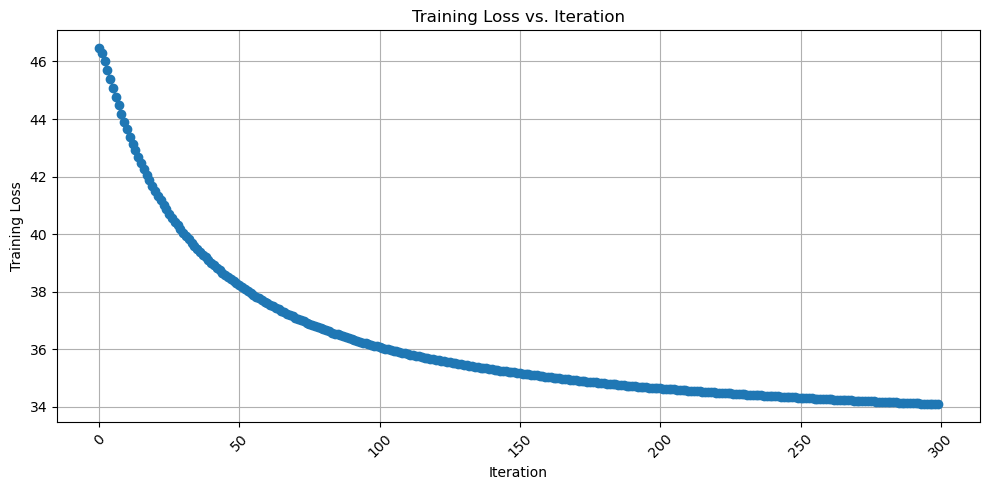

In [5]:
# the direction of two images. Both of them are from ImageNet
img1_dir = "./data/images/anakin-its-working-medium.png"
img2_dir = "./data/images/gmm-example4.png"
img3_dir = "./data/images/dog.png"

# example of loading image
# image1 = imageio.imread("./data/images/gmm-example1.png")


# this is for you to implement
def perform_GS(image, num_GS=100, max_iters=50):
    """
    Using the helper function above to find the optimal number of clusters that can appropriately produce a single image.
    You can simply examine the answer based on your visual inspection (i.e. looking at the resulting images) or provide any metrics you prefer.

    Args:
        image: input image of shape(H, W, 3)
        min_clusters, max_clusters: the minimum and maximum number of clusters you should test with. Default are 5 and 15.
        (Usually the maximum number of clusters would not exeed 15)

    Return:
        plot: comparison between original image and image pixel clustering.
        optional: any other information/metric/plot you think is necessary.

    UNDERGRADS HINT: set full_matrix = False when using the helper functions
    """

    # TODO: Finish this function
    image_list = [image]
    title_list = ["Original Image"]
    image = image.astype(np.float32)
    gs_img, iter_list, loss_list = Gaussian2D(image, K=num_GS, max_iters=max_iters, lr=10.0, momentum=0.5)()
    image_list.append(gs_img)
    title_list.append(f"Image with {num_GS} Gaussians")
    plot_images(image_list, title_list)
    plot_loss(iter_list, loss_list)


image = imageio.v2.imread(img2_dir)
perform_GS(image, 2000, 300)

# image2 = imageio.imread(img2_dir)
# perform_compression(image2, 5, 10)